In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
#Bring in pre-processed data
X_train = pd.read_csv("data/X_train_preproc.csv")
y_train = pd.read_csv("data/y_train_preproc.csv")
X_test  = pd.read_csv("data/X_test_preproc.csv")
y_test  = pd.read_csv("data/y_test_preproc.csv")

In [2]:
from sklearn import svm
clf = svm.SVC()
clf.fit( X_train, np.ravel(y_train) )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
#Test set accuracy
clf.score(X_test, np.ravel(y_test))

0.87133396404919583

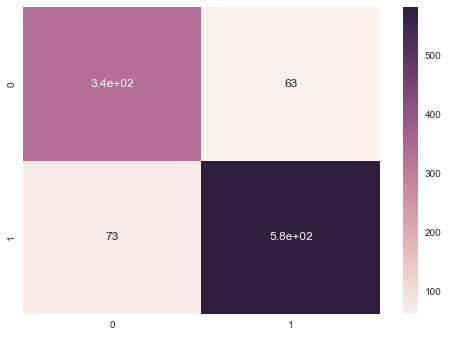

In [4]:
#Test set confusion.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True)

In [11]:
#Cross validation performance.
from sklearn import cross_validation
clf = svm.SVC()
scores = cross_validation.cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
scores

array([ 0.89467456,  0.87692308,  0.87218935,  0.87692308,  0.8591716 ])

In [12]:
"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

'Accuracy: 0.88 (+/- 0.02)'

In [8]:
#All possible hyperparameters
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
# When included, didn't finish running for long time 
#{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 10, 50, 100, 1000]}]

scores = ['precision', 'recall']



In [12]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, n_jobs=4,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, np.ravel(y_train))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}

Grid scores on development set:

0.875 (+/-0.022) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.858 (+/-0.031) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.840 (+/-0.021) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.788 (+/-0.046) for {'kernel': 'rbf', 'C': 1, 'gamma': 1e-05}
0.865 (+/-0.021) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.883 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.857 (+/-0.028) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.840 (+/-0.021) for {'kernel': 'rbf', 'C': 10, 'gamma': 1e-05}
0.862 (+/-0.025) for {'kernel': 'rbf', 'C': 50, 'gamma': 0.01}
0.880 (+/-0.025) for {'kernel': 'rbf', 'C': 50, 'gamma': 0.001}
0.873 (+/-0.027) for {'kernel': 'rbf', 'C': 50, 'gamma': 0.0001}
0.852 (+/-0.029) for {'kernel': 'rbf', 'C': 50, 'gamma': 1e-05}
0.864 (+/-0.025) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.876 (

In [ ]:
np.linrange()

In [ ]:
'kernel': 'rbf', 'C': 10, 'gamma': 0.001
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 10, 50, 100, 1000]}]

In [13]:
from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.001, 'kernel': 'rbf', 'C': 10}

Grid scores on development set:

0.987 (+/-0.018) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1}
0.959 (+/-0.030) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1}
0.988 (+/-0.018) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.982 (+/-0.027) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10}
0.988 (+/-0.018) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}
0.982 (+/-0.026) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100}
0.988 (+/-0.018) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1000}
0.982 (+/-0.026) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1000}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model 